<a href="https://colab.research.google.com/github/Deinbi/Machine__Learning_Alura/blob/main/Clasificacion_validacion_y_metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

En este curso, vamos a crear un proyecto de clasificación de clientes morosos en una empresa de financiamiento de automóviles. La Scikit-Learn será la principal biblioteca utilizada para realizar la validación y evaluación del rendimiento de los modelos de clasificación durante el curso. Explorar la documentación de esta biblioteca puede brindarte una excelente oportunidad para mejorar tus habilidades y adquirir mayor autonomía en la validación y en las métricas de modelos a lo largo del curso. Por lo tanto, a medida que avancemos, aprovecha este recurso adicional en tu aprendizaje.

Datos del proyecto
Para realizar la clasificación de los clientes, se utilizará una base de datos para alimentar nuestro proyecto. El uso de esta base es esencial, ya que, una vez descargada, proporciona la información necesaria para construir nuestros modelos de clasificación y te ofrece valiosa experiencia práctica en machine learning.

Google Colaboratory
Vamos a utilizar Google Colaboratory, que ya viene con las bibliotecas necesarias, incluida la Scikit-Learn en la versión 1.2.2, para construir el proyecto. Para que puedas usarlo, es necesario tener una cuenta de Gmail, ya que todo notebook se almacenará en Google Drive.

Si deseas utilizar el notebook inicial del instructor para desarrollar el proyecto, puedes obtenerlo a través del Proyecto - validación y métricas.

Al seguir este camino, tendrás un desarrollo eficaz, siendo capaz de adquirir habilidades valiosas en ciencia de datos mientras contribuyes a mejorar la toma de decisiones de la empresa de financiamiento de automóviles, todo de forma colaborativa y accesible.

---



# <font color='dark'>**Clasificación: Validación de modelos y métricas de evaluación**</h1>

### Proyecto

Una empresa de financiamiento de automóviles está atravesando una situación complicada, con una alta demanda para una flota reducida de vehículos y un alto número de morosos, lo que está generando grandes pérdidas para la empresa.

Nosotros fuimos contratados para buscar mejoras en la identificación de morosos. El análisis de los clientes actualmente se realiza de forma manual, cliente por cliente, lo que consume mucho tiempo y, aun así, la detección de morosos es muy imprecisa.

Nuestra tarea es utilizar los datos proporcionados por la empresa para **clasificar** a los clientes en cumplidores y morosos.

## <font color='dark'>Clasificando los datos</h1>

### Creando un modelo inicial

In [20]:
import pandas as pd

In [21]:
datos = pd.read_csv('/content/prestacar.csv')

In [22]:
datos.head(1)

,ingresos_cliente,anualidad_prestamo,años_casa_propia,telefono_trab,evaluacion_ciudad,score_1,score_2,score_3,score_social,cambio_telefono,moroso
0,12600.0,3569.4,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.0,0


In [23]:
X = datos.drop(columns='moroso',axis=1)

In [24]:
X.head(1)

,ingresos_cliente,anualidad_prestamo,años_casa_propia,telefono_trab,evaluacion_ciudad,score_1,score_2,score_3,score_social,cambio_telefono
0,12600.0,3569.4,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.0


In [25]:
y = datos.moroso

In [26]:
y

,moroso
0,0
1,0
2,0
3,0
4,0
...,...
54020,1
54021,1
54022,1
54023,1


In [27]:
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier()
modelo.fit(X,y)
modelo.score(X,y)

1.0

In [28]:
print(f'La exactitud del modelo es: {modelo.score(X,y)}')

La exactitud del modelo es: 1.0


Generamos un modelo inicial de árbol de decisión para determinar si un cliente era moroso o no, y nuestro modelo nos dio una exactitud del 100%. Pero, ¿lo hicimos de la forma correcta?

La manera en que ejecutamos ese primer modelo es similar a darle a una persona un examen con las respuestas y, después de que esa persona tenga acceso a ese examen con todas las respuestas, presentarle exactamente el mismo examen con las mismas respuestas. Si la persona memoriza ese examen con las mismas palabras y respuestas, entonces el día de mañana que le quieras preguntar algo similar con otras palabras, tal vez la persona no tenga la capacidad de generalizar bien el concepto porque se dedicó a memorizar.

Lo mismo sucede con los modelos de Machine Learning (Aprendizaje Automático). Si entreno y pruebo mi modelo con el mismo conjunto de datos, eso es igual a que el modelo memorice completamente todas las salidas. Por eso, en el caso específico del árbol de decisión, mi modelo siempre va a llegar a un 100% de exactitud.



---
Durante la construcción de un modelo para clasificar transacciones bancarias como legítimas o fraudulentas, una persona científica de datos utilizó la biblioteca Scikit-Learn, que ofrece diversos algoritmos de machine learning que pueden ser utilizados para la clasificación de datos. En cada uno de estos algoritmos, el método fit() se utiliza para entrenar un modelo a partir de las variables explicativas y la variable respuesta.

Sin embargo, después del entrenamiento del modelo, se realiza un paso más mediante el uso del método score(). Seleccione la alternativa que describe de manera adecuada la finalidad de usar el score() en este contexto:

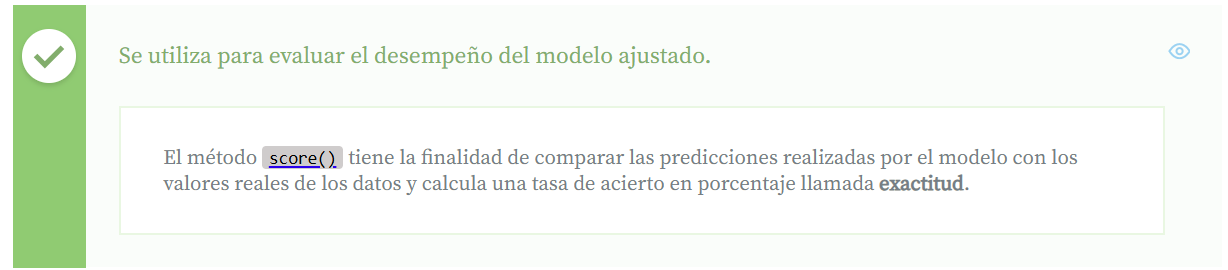


---



### Validando el modelo

Evaluar el modelo con los mismos datos utilizados en el entrenamiento no es recomendable. Es necesario que la evaluación se realice con datos independientes.  

Evaluar el modelo con los propios datos de entrenamiento sería equivalente a entregar un examen con las preguntas y las respuestas a una persona y, al momento de evaluarla nuevamente, entregarle un examen con las mismas preguntas y opciones. Se espera que esa persona obtenga un buen resultado, ya que ya ha visto las respuestas y ha memorizado el resultado. Esto es diferente de haber aprendido la materia a partir de ese examen y luego presentar una prueba con contenido similar y obtener un resultado positivo.  

Con el objetivo de verificar la capacidad de generalización de un modelo, debemos dividir el conjunto de datos en tres partes: datos de entrenamiento, validación y prueba.  

- El **conjunto de entrenamiento** se utiliza para entrenar los modelos. A partir de este conjunto, los modelos identifican patrones en los datos.  

- El **conjunto de validación** se emplea para evaluar el desempeño de diferentes modelos con datos nuevos que no fueron utilizados en el entrenamiento.  

- El **conjunto de prueba** se mantiene separado desde el inicio para simular datos del mundo real. No se utiliza en ninguna etapa del entrenamiento ni de la validación, sirviendo como una estimación de la capacidad del modelo elegido para generalizar y predecir nuevos datos.

<a href="https://ibb.co/9H2Z1HZ5"><img src="https://i.ibb.co/0yZs6ysb/datos-train-test.png" alt="datos-train-test" border="0"></a>

Entonces, la buena práctica cuando trabajamos con Machine Learning es tener tres conjuntos de datos. Podríamos hablar de dos conjuntos: uno compuesto por un conjunto de prueba y el otro conjunto compuesto por el conjunto de entrenamiento y el conjunto de validación.

¿Cuál es el objetivo? Que desde el principio, aísle un grupo de mis datos para probarlo sólo al final, que nunca vea los datos que voy a dejar en el grupo de prueba para poder ver que efectivamente mi modelo está generalizando bien con datos que nunca vio, es decir, simulando un ambiente de producción de un modelo de Machine Learning.

Entonces, tenemos una parte de prueba y en el otro conjunto tenemos la parte dedicada a entrenamiento y validación. Entonces, tengo lógicamente un segmento para entrenar mi modelo y un segmento para validarlo. ¿Entonces cuál es la idea? Que este de validación no lo vea durante entrenamiento y únicamente lo use a la hora de validar si el entrenamiento está generalizando bien o no.

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X,X_test,y,y_test = train_test_split(X,y,test_size=0.15,stratify=y,random_state=5)
X_train,X_val,y_train,y_val = train_test_split(X,y,stratify=y,random_state=5)

En nuestro caso, vamos a hacer primero la separación para el entrenamiento y validación y para prueba, y después vamos a hacer la separación de entrenamiento y validación efectivamente. ¿Cómo lo hacemos? Vamos a tomar nuestra X, nuestra X, Test, vamos a tomar nuestra Y y nuestra Y, Test que van a ser los de prueba y vamos a hacer lo siguiente Train, Test, Split. Vamos a introducirle nuestra X, nuestra Y, vamos a tomar una base de prueba Test, Size del 15%, 0.15 y vamos a utilizar el método Stratify.

¿Cuál es el objetivo de hacer este Stratify? Que deje la misma cantidad de observaciones para morosos en los dos conjuntos de datos que estoy separando. ¿Qué quiere decir ello? Que si en mi conjunto de prueba tengo un 10% de morosos, también quiero que en mi conjunto de entrenamiento y validación exista un 10% de morosos. Entonces, esa es la idea y vamos a hacer este Stratify utilizando nuestra Y.

Por último, vamos a establecer un estado de aleatoriedad RandomState y vamos a darle el número 5. El estado de aleatoriedad básicamente nos permite replicar esta misma división en cualquier momento, es decir, la forma en que voy a dividir mis muestras en este ejercicio podrá replicarse en cualquier máquina, porque siempre que utilice el RandomState 5 él va a dividir de la misma manera, por eso se llama un estado de pseudo aleatoriedad.

Ahora vamos a hacer lo mismo pero para la validación. Entonces, vuelvo y tomo mi nueva X y mi nueva Y, ¿verdad? Y en vez de XTEST aquí voy a llamar XVAL y YVAL, ¿ok?

Y aquí, en lugar de dejarlo como X, lo voy a cambiar a XTRAIN y en lugar de dejar Y así, lo voy a cambiar a YTRAIN. De esta manera, ya segmento mis datos para entrenamiento y para prueba. No voy a especificar el tamaño de la prueba porque por defecto es el 25%. Si observas aquí, indica que cuando no se aplica un tamaño de prueba, se configura al 25%, así que lo dejaré así, ¿de acuerdo? Y el resto permanece igual. Entonces, ejecutamos nuestra celda.

In [31]:
modelo = DecisionTreeClassifier()
modelo.fit(X_train,y_train)
print(f'La exactitud del modelo con el conjunto de entrenamiento es de: {modelo.score(X_train,y_train)}')
print(f'La exactitud del modelo con el conjunto de validación es de: {modelo.score(X_val,y_val)}')

La exactitud del modelo con el conjunto de entrenamiento es de: 1.0
La exactitud del modelo con el conjunto de validación es de: 0.8490549603693058


En nuestro caso, vamos a hacer primero la separación para el entrenamiento y validación y para prueba, y después vamos a hacer la separación de entrenamiento y validación efectivamente. ¿Cómo lo hacemos? Vamos a tomar nuestra X, nuestra X, Test, vamos a tomar nuestra Y y nuestra Y, Test que van a ser los de prueba y vamos a hacer lo siguiente Train, Test, Split. Vamos a introducirle nuestra X, nuestra Y, vamos a tomar una base de prueba Test, Size del 15%, 0.15 y vamos a utilizar el método Stratify.

¿Cuál es el objetivo de hacer este Stratify? Que deje la misma cantidad de observaciones para morosos en los dos conjuntos de datos que estoy separando. ¿Qué quiere decir ello? Que si en mi conjunto de prueba tengo un 10% de morosos, también quiero que en mi conjunto de entrenamiento y validación exista un 10% de morosos. Entonces, esa es la idea y vamos a hacer este Stratify utilizando nuestra Y.

Por último, vamos a establecer un estado de aleatoriedad RandomState y vamos a darle el número 5. El estado de aleatoriedad básicamente nos permite replicar esta misma división en cualquier momento, es decir, la forma en que voy a dividir mis muestras en este ejercicio podrá replicarse en cualquier máquina, porque siempre que utilice el RandomState 5 él va a dividir de la misma manera, por eso se llama un estado de pseudo aleatoriedad.

Ahora vamos a hacer lo mismo pero para la validación. Entonces, vuelvo y tomo mi nueva X y mi nueva Y, ¿verdad? Y en vez de XTEST aquí voy a llamar XVAL y YVAL, ¿ok?

Y aquí, en lugar de dejarlo como X, lo voy a cambiar a XTRAIN y en lugar de dejar Y así, lo voy a cambiar a YTRAIN. De esta manera, ya segmento mis datos para entrenamiento y para prueba. No voy a especificar el tamaño de la prueba porque por defecto es el 25%. Si observas aquí, indica que cuando no se aplica un tamaño de prueba, se configura al 25%, así que lo dejaré así, ¿de acuerdo? Y el resto permanece igual. Entonces, ejecutamos nuestra celda.

Observa que durante el entrenamiento, ¿verdad? Llegó al 100%, ¿de acuerdo? Y a la hora de validar, llegó al 84%. ¿Qué significa esto? Que mi modelo de árbol se memorizó completamente todas las salidas y por eso llegó al 100% y al momento de colocar datos que no ha visto, al momento de validarlo, entonces llegó al 84%.

**Esta no es la mejor forma de instanciar un modelo de
árbol de decisión**, sino que debemos establecer una profundidad al menos.

Entonces voy a colocar MAXDEPTH igual a 10, es decir, que baje 10 porque si no le coloco profundidad, se va a ir hasta el final.

Por eso es que llega al 100%, ¿de acuerdo? Entonces es simplemente colocar ese MAXDEPTH y ejecutamos nuestra celda.

In [32]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(X_train,y_train)
print(f'La exactitud del modelo con el conjunto de entrenamiento es de: {modelo.score(X_train,y_train)}')
print(f'La exactitud del modelo con el conjunto de validación es de: {modelo.score(X_val,y_val)}')

La exactitud del modelo con el conjunto de entrenamiento es de: 0.9206445993031359
La exactitud del modelo con el conjunto de validación es de: 0.9055831373573731


Y ahora observa que ya con este parámetro, durante mi entrenamiento llegó a un 92% y la exactitud del modelo al momento de validarlo fue el 90%. ¿Cuál es la conclusión aquí? Está generalizando mejor. ¿Por qué? Porque no se está memorizando todas las salidas y únicamente ajustamos un parámetro, ¿de acuerdo? Entonces aquí ya comenzamos a encontrar el camino para poder hacer nuestra validación del modelo, pero ahora también nos falta evaluarlo. Y eso lo veremos en nuestro próximo video.





---

Para saber más: método holdout

En el momento de validar modelos de clasificación, necesitamos verificar si el modelo está realmente generalizando, es decir, si está comprendiendo el patrón de los datos y clasificando correctamente datos nuevos. La estrategia más simple para evaluar esta generalización, conocida como holdout, consiste en dividir los datos en dos partes: un conjunto de datos de entrenamiento y otro de prueba. El conjunto de entrenamiento se utiliza para entrenar el modelo, mientras que el conjunto de prueba se usa para evaluar el rendimiento del modelo en datos no vistos anteriormente.

Con la ayuda de la imagen a continuación, analiza la ejemplificación del método holdout en funcionamiento:

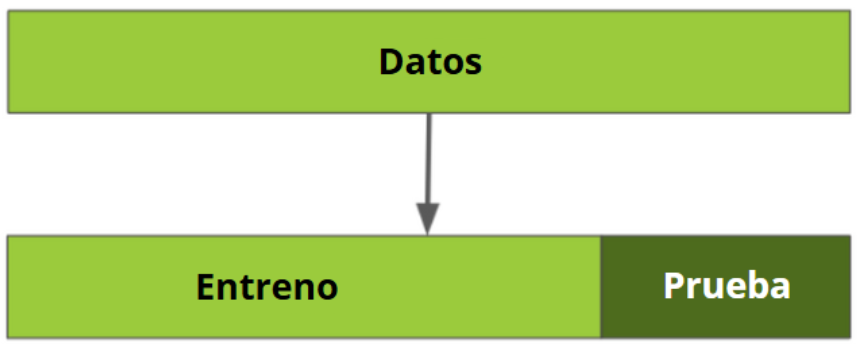


En algunos casos, especialmente cuando se realizan ajustes finos en los parámetros del modelo, es útil tener un conjunto de validación adicional. En este caso, la división se hace en tres partes: conjunto de entrenamiento, conjunto de validación y conjunto de prueba. El conjunto de validación se utiliza en la comparación de diferentes modelos, en la selección del modelo más adecuado y en el ajuste de los hiperparámetros. Mientras tanto, el conjunto de prueba sigue utilizándose para evaluar el rendimiento final del modelo elegido, después de todo el proceso de ajuste.

Por eso, cuanto más se utilizan los mismos datos para tomar decisiones sobre configuraciones de mejoras en el modelo o elección de hiperparámetros, más comprometida se vuelve la confiabilidad de esos resultados al ser generalizados para datos nuevos y no vistos. Esto ocurre porque las mejoras se hacen a partir de esos datos de validación.

Es posible percibir que las mejoras aplicadas desempeñan un papel fundamental para resolver el problema. Sin embargo, para asegurar que el rendimiento del modelo permanezca consistente en relación a los datos del mundo real, que no fueron vistos en el entrenamiento o en la mejora de los modelos, la estrategia de la división entre 3 conjuntos de datos, como se puede analizar en la imagen siguiente, ofrece una buena dirección final, ya que indica si el modelo elegido está sesgado o no en relación a los datos de validación.

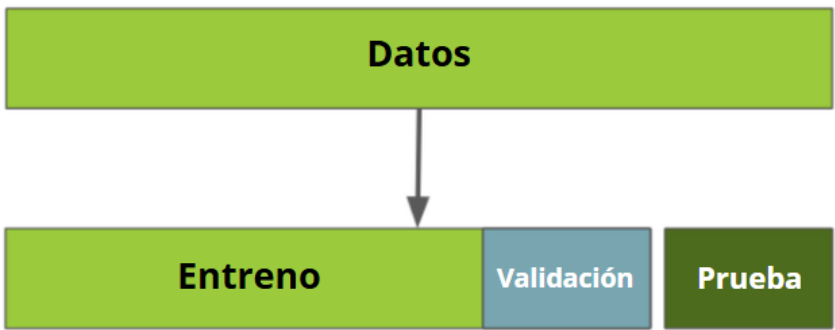




---



### Evaluando el modelo

Sin embargo, ¿qué significa precisión? Significa que en el 90% de los casos, mi modelo generalizó bien, por ejemplo, para este caso en la validación. Pero, ¿qué generalizó bien? Es decir, en el 90% de los casos, ¿qué sucedió? ¿Identificó cuántos deudores o cuántos clientes cumplidos? No tenemos esta visibilidad en este punto.

Por lo tanto, la precisión es una métrica que no nos dice mucho. Nos indica si el modelo está generalizando bien o no, pero no conocemos en detalle qué es lo que está generalizando y si es de nuestro interés. Para ello, vamos a utilizar también una herramienta para validar nuestros modelos, que es la matriz de confusión.

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
y_previsto = modelo.predict(X_val)
matriz_confusion = confusion_matrix(y_val,y_previsto)
print(matriz_confusion)

[[10356   123]
 [  961    41]]


Observa que me devolvió una matriz, pero no sé realmente estos valores. 10,356, 123, 957, 45. ¿Pero qué? ¿Qué es qué? Entonces, para ello vamos a continuar aquí importando recursos. From sklearn.metrics import confusion_matrix display, que nos va a permitir dibujar nuestra matriz de confusión.

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay

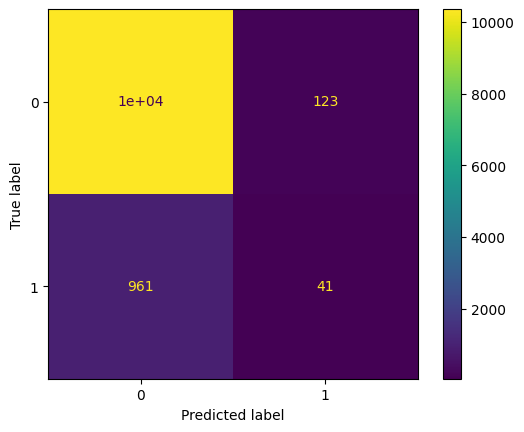

In [39]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion)
visualizacion.plot();

Tenemos nuestra matriz de confusión:

En el eje Y tenemos los valores reales, 0 siendo cumplido, 1 siendo deudor.

Y aquí en el eje X tenemos los valores previstos, 0 siendo cumplido y 1 siendo deudor.

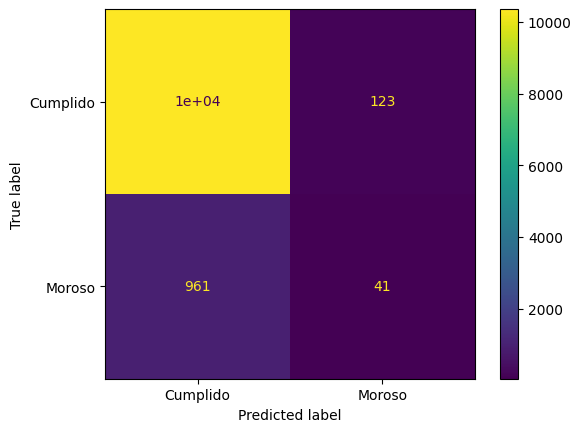

In [40]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion, display_labels=['Cumplido','Moroso'])
visualizacion.plot();

Perfecto. Entonces, ¿qué quiere decir mi matriz de confusión? Que de mi modelo, predijo cumplidos de todo el conjunto de datos, al momento de validar, más de 10,000 clientes de forma correcta. Sin embargo, hubo 957 clientes que mi modelo dijo que eran cumplidos, pero en realidad eran deudores. Es decir, 957 clientes fueron clasificados como clientes cumplidos, pero en realidad eran deudores.

Entonces, existe un riesgo muy grande aquí. Y en este lado, ¿verdad? Lo mismo sucede con los morosos. Mi modelo indicó que 123 clientes eran morosos, cuando en realidad eran cumplidos. Y solo identificó a 45 de estos morosos, ¿verdad? Es decir, solo clasificó de manera efectiva a 45 clientes morosos como morosos. Y de manera efectiva, más de 10,000 clientes cumplidos como cumplidos.

Estos números aquí, digamos, son los que nos permitirán trabajar con nuestro modelo para mejorarlo. Porque definitivamente queremos priorizar los casos en los que nuestro cliente realmente es moroso. Y no decir, por ejemplo, que es un cliente moroso cuando en realidad es cumplido. Entonces, dejaría de prestarle a 123 personas o a 123 clientes que me iban a pagar bien. Y estoy prestando a 957 clientes que no me van a pagar bien. Entonces, aquí, digamos, se está asumiendo un riesgo muy grande. Potencialmente, ¿no? Estamos hablando potencialmente.

## <font color='dark'>Métricas de evaluación</h1>

### Exactitud, precisión y recall (sensibilidad).

<a href="https://ibb.co/351SbY7t"><img src="https://i.ibb.co/wZypqrRD/matriz-confusion.png" alt="matriz-confusion" border="0"></a>

<a href="https://imgbb.com/"><img src="https://i.ibb.co/6Jp6rKyC/Captura-de-tela-2025-03-22-120744.png" alt="Captura-de-tela-2025-03-22-120744" border="0"></a>

### Curva ROC

In [33]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/dariyasydykova/open_projects/master/ROC_animation/animations/cutoff.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)




### Curva de  precisión x sensibilidad

In [34]:
Image(url='https://paulvanderlaken.com/wp-content/uploads/2019/08/roc.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)


### Informe de métricas

## <font color='dark'> Validación cruzada</h1>

### Usando KFold

La validación del modelo de clasificación a partir de la separación de los datos en conjuntos de entrenamiento y validación hace que el resultado dependa en gran medida de esta división. Puede suceder que, de forma aleatoria, el patrón de los datos de validación sea diferente al de los datos de entrenamiento, lo que podría llevar a obtener un resultado mucho mejor o mucho peor que la realidad simplemente por suerte o mala suerte.  

Teniendo esto en cuenta, es posible utilizar la **validación cruzada**, una estrategia más consistente y ampliamente utilizada en proyectos de *machine learning*.  

En la validación cruzada, en lugar de separar los datos en entrenamiento y validación una sola vez, se dividen en varias partes de igual tamaño. En cada una de estas divisiones, se usa una parte para validación y todas las demás para entrenamiento. Este proceso se repite hasta que todas las partes hayan sido utilizadas tanto para validación como para entrenamiento.  

Se generará un modelo para cada una de estas divisiones y la evaluación del desempeño se realizará promediando la métrica de cada modelo. Esto elimina la dependencia de la separación de los datos, ya que hay una mayor variación en la selección de los mismos y se obtiene un valor medio.  

Generalmente, se utilizan 5 o 10 partes. Un número mayor no suele ser necesario, ya que implica un procesamiento más costoso, y valores menores ya ayudan a mitigar el problema de la selección de los datos.

<a href="https://ibb.co/KcBtshJR"><img src="https://i.ibb.co/nq4X1mFZ/train-y-validacion.png" alt="train-y-validacion" border="0"></a>

### Validación cruzada con sensibilidad

### Estratificando los datos

## <font color='dark'>Balanceo de los datos</h1>

### Oversampling

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#id1

### Pipeline para validación

### Undersampling

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html

### Probando el modelo